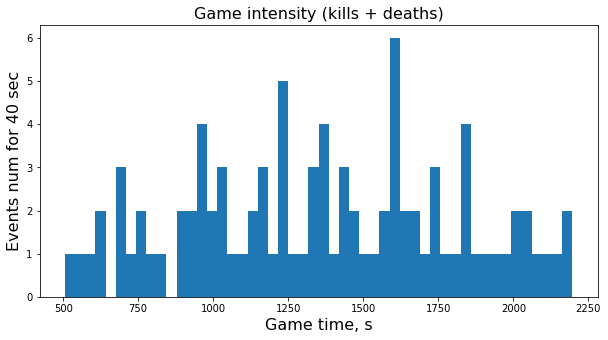

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE = 'game_stat_denis.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(GAME_STAT_FILE)
df['time'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title("Game intensity (kills + deaths)", fontsize=16)
plt.xlabel("Game time, s", fontsize=16)
plt.ylabel("Events num for 40 sec", fontsize=16)

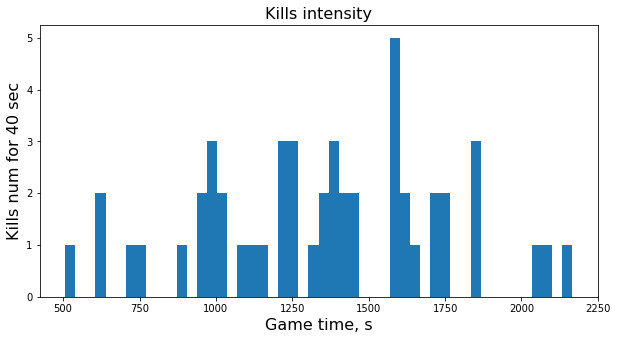

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE_KILLS = 'game_stat_denis_kills.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(GAME_STAT_FILE_KILLS)
df['time'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title("Kills intensity", fontsize=16)
plt.xlabel("Game time, s", fontsize=16)
plt.ylabel("Kills num for 40 sec", fontsize=16)

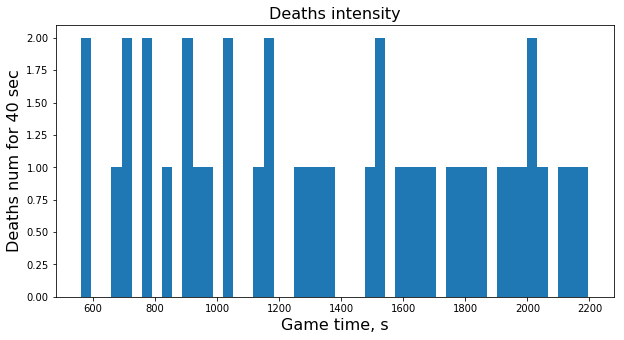

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE_DEATHS = 'game_stat_denis_deaths.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(GAME_STAT_FILE_DEATHS)
df['time'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title("Deaths intensity", fontsize=16)
plt.xlabel("Game time, s", fontsize=16)
plt.ylabel("Deaths num for 40 sec", fontsize=16)

[1, 0.5, 0.0, 0, 1.0, 0.0, 0, 1.0, 0, 0.0, 2, 0, 0.0, 1, 0.5, 0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1, 1.0, 0.5, 2, 4.0, 0.0, 2.0, 3.0, 1, 4, 0.0, 0.0, 1.0, 5.0, 2, 0.0, 2, 2.0, 0.0, 1.5, 0, 0.0, 0.0, 0.0, 1.0, 1, 0.0, 1.0] 50
[221.0, 260.5, 300.0, 339.5, 379.0, 418.5, 458.0, 497.5, 537.0, 576.5, 616.0, 655.5, 695.0, 734.5, 774.0, 813.5, 853.0, 892.5, 932.0, 971.5, 1011.0, 1050.5, 1090.0, 1129.5, 1169.0, 1208.5, 1248.0, 1287.5, 1327.0, 1366.5, 1406.0, 1445.5, 1485.0, 1524.5, 1564.0, 1603.5, 1643.0, 1682.5, 1722.0, 1761.5, 1801.0, 1840.5, 1880.0, 1919.5, 1959.0, 1998.5, 2038.0, 2077.5, 2117.0, 2156.5] 50


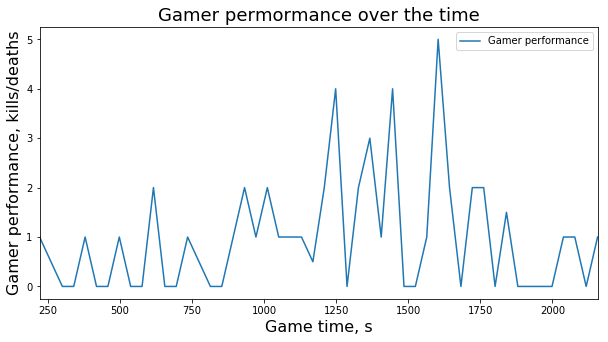

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE = 'game_stat_denis.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(GAME_STAT_FILE)
step = 40
kills_num = 0
deaths_num = 0
start = df['time'][0]
end = df['time'][len(df) - 1]
gp_list = [0] * 50
cur_gp = 0
death_count = 0
kills_count = 0
cur_bin = 0
prev_bin = 0
time_series = [(end - start)*(i/50) + start for i in range(50)]

for i in range(len(df)):
    cur_bin = int(round((df['time'][i] - start)/39.5))
    if (cur_bin != prev_bin):
        if (death_count == 0):
            gp_list[prev_bin] = kills_count
        else:
            gp_list[prev_bin] = kills_count/death_count
        kills_count = 0
        death_count = 0
    if df['event'][i] == 'k':
        kills_count += 1
    if df['event'][i] == 'd':
        death_count += 1
        
    #if (death_count == 0):
    #    print(cur_bin, kills_count, death_count, kills_count)
    #else:
    #    print(cur_bin, kills_count, death_count, kills_count/death_count)
    prev_bin = cur_bin
    
print(gp_list, len(gp_list))
print(time_series, len(time_series))
df_raw = pd.DataFrame({'Gamer performance': gp_list}, index=time_series)

line = df_raw.plot.line(figsize=(10,5))
line.set_title("Gamer permormance over the time", size=18)
line.set_xlabel("Game time, s", size=16)
line.set_ylabel("Gamer performance, kills/deaths", size=16)

(50, 110)

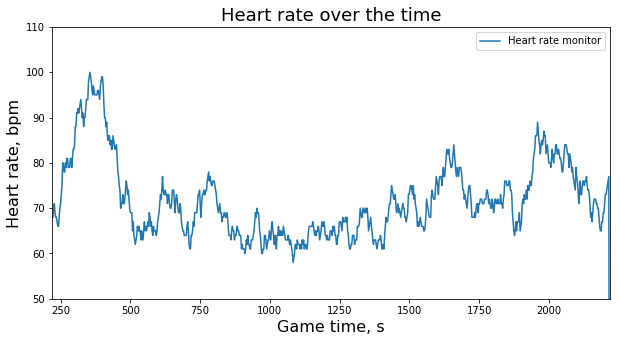

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE = 'game_stat_denis.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(HRM_MOUSE)

time_series = [df['time'][i] for i in range(len(df))]
hrm_vitals = [df['hrm'][i] for i in range(len(df))]

df_raw = pd.DataFrame({'Heart rate monitor': hrm_vitals}, index=time_series)
line = df_raw.plot.line(figsize=(10,5))
line.set_title("Heart rate over the time", size=18)
line.set_xlabel("Game time, s", size=16)
line.set_ylabel("Heart rate, bpm", size=16)
line.set_ylim(50, 110)

array([[ 1.        , -0.24247637],
       [-0.24247637,  1.        ]])

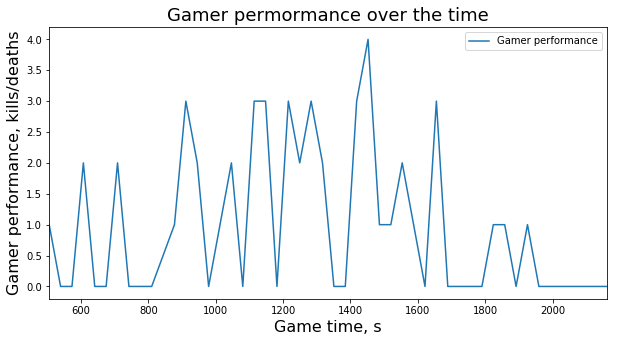

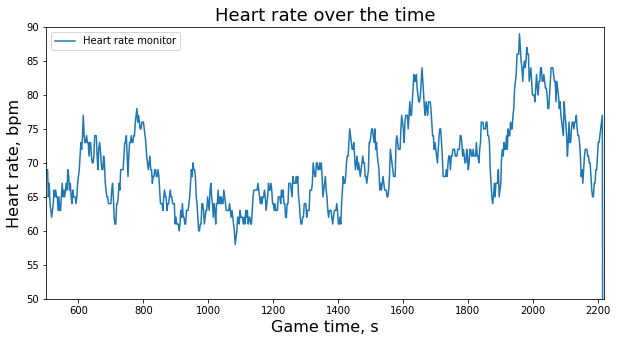

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE = 'game_stat_denis.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(GAME_STAT_FILE)
step = 40
kills_num = 0
deaths_num = 0
start = df['time'][0]
end = df['time'][len(df) - 1]
gp_list = [0] * 50
cur_gp = 0
death_count = 0
kills_count = 0
cur_bin = 0
prev_bin = 0
time_series = [(end - start)*(i/50) + start for i in range(50)]

for i in range(len(df)):
    cur_bin = int(round((df['time'][i] - start)/39.5))
    if (cur_bin != prev_bin):
        if (death_count == 0):
            gp_list[prev_bin] = kills_count
        else:
            gp_list[prev_bin] = kills_count/death_count
        kills_count = 0
        death_count = 0
    if df['event'][i] == 'k':
        kills_count += 1
    if df['event'][i] == 'd':
        death_count += 1
        
    #if (death_count == 0):
    #    print(cur_bin, kills_count, death_count, kills_count)
    #else:
    #    print(cur_bin, kills_count, death_count, kills_count/death_count)
    prev_bin = cur_bin
    
df_raw = pd.DataFrame({'Gamer performance': gp_list}, index=time_series)

line = df_raw.plot.line(figsize=(10,5))
line.set_title("Gamer permormance over the time", size=18)
line.set_xlabel("Game time, s", size=16)
line.set_ylabel("Gamer performance, kills/deaths", size=16)

df_hrm = pd.read_csv(HRM_MOUSE)

timee_series = [df_hrm['time'][i] for i in range(len(df_hrm))]
hrm_vitals = [df_hrm['hrm'][i] for i in range(len(df_hrm))]

df_rawe = pd.DataFrame({'Heart rate monitor': hrm_vitals}, index=timee_series)
line2 = df_rawe.plot.line(figsize=(10,5))
line2.set_title("Heart rate over the time", size=18)
line2.set_xlabel("Game time, s", size=16)
line2.set_ylabel("Heart rate, bpm", size=16)
line2.set_ylim(50, 90)

this_a = []
that_a = []
for i in range(len(timee_series)):
    this_value = timee_series[i]
    closest_idx1 = np.argmin(np.abs(time_series - this_value))
    this_a.append(gp_list[closest_idx1])
    that_a.append(hrm_vitals[i])

np.corrcoef(this_a, that_a)

(-1.5, 1.5)

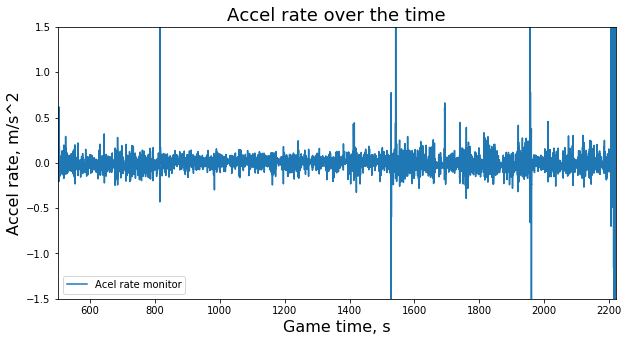

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

GAME_STAT_FILE = 'game_stat_denis.csv'
ACCEL_MOUSE = 'accel_denis_right.csv'
ACCEL_KEYBOARD = 'accel_denis_left.csv'
HRM_MOUSE = 'hrm_denis_right.csv'
HRM_KEYBOARD = 'hrm_denis_left.csv'

df = pd.read_csv(ACCEL_MOUSE)

time_series = [df['time'][i] for i in range(len(df))]
hrm_vitals = [df['accx'][i] for i in range(len(df))]

df_raw = pd.DataFrame({'Acel rate monitor': hrm_vitals}, index=time_series)
line = df_raw.plot.line(figsize=(10,5))
line.set_title("Accel rate over the time", size=18)
line.set_xlabel("Game time, s", size=16)
line.set_ylabel("Accel rate, m/s^2", size=16)
line.set_ylim(-1.5, 1.5)